In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os 
import folium
import json

In [2]:
country_geo = r"C:\Users\rebec\OneDrive\Desktop\CareerFoundry\Achievement 6\6.3\us-states.json"

In [3]:
country_geo

'C:\\Users\\rebec\\OneDrive\\Desktop\\CareerFoundry\\Achievement 6\\6.3\\us-states.json'

In [4]:
path = r"C:\Users\rebec\OneDrive\Desktop\CareerFoundry\Achievement 6"

In [5]:
covidus = pd.read_csv(os.path.join(path, "6.3", "covidus.csv"))

In [6]:
covidus.head()

Date of Observation Province/State Country/Region  Confirmed  Deaths  \
0           1/31/2020       Illinois             US          2       0   
1           1/31/2020     California             US          2       0   
2           1/31/2020     Washington             US          1       0   
3           1/31/2020        Arizona             US          1       0   
4           3/31/2020        Alabama             US       1063      23   

   Recovered  Cases/months  Deaths/months  
0          0             2              0  
1          0             2              0  
2          0             1              0  
3          0             1              0  
4          0          1063             23

In [7]:
covidus.shape

(769, 8)

### Data Wrangling

#### Fix dummy columns

In [54]:
# Select only the necessary columns and put them in a list called columns
columns = ["Date of Observation", "Province/State", "Cases/months"]

In [55]:
# Create a subset
state_covid = covidus[columns]

In [56]:
state_covid.head()

Date of Observation Province/State  Cases/months
0           1/31/2020       Illinois             2
1           1/31/2020     California             2
2           1/31/2020     Washington             1
3           1/31/2020        Arizona             1
4           3/31/2020        Alabama          1063

In [57]:
type(state_covid)

pandas.core.frame.DataFrame

### 3. Conduct consistency checks

In [58]:
# Check for missing values
state_covid.isnull().sum()

Date of Observation    0
Province/State         0
Cases/months           0
dtype: int64

##### Duplicates check

In [59]:
dups = state_covid.duplicated()

In [60]:
dups.shape

(769,)

In [61]:
# no duplicates

##### Extreme values checks

<AxesSubplot:xlabel='Cases/months', ylabel='Count'>

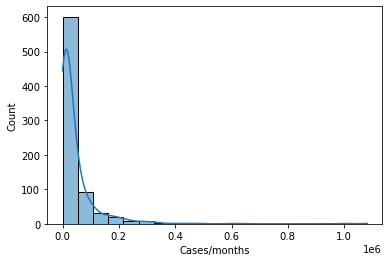

In [62]:
sns.histplot(state_covid['Cases/months'], bins=20, kde = True)

In [64]:
# shows extreme values for Cases/months, but they are needed in the analysis to compare states

In [65]:
# Can't change the numbers as they are needed for the analysis

In [66]:
state_covid.dtypes

Date of Observation    object
Province/State         object
Cases/months            int64
dtype: object

### 4. Plotting a choropleth

In [67]:
# Create a data frame with just the states and the values for rating we want plotted
data_to_plot = state_covid[['Province/State','Cases/months',]]
data_to_plot.head()

Province/State  Cases/months
0       Illinois             2
1     California             2
2     Washington             1
3        Arizona             1
4        Alabama          1063

In [71]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Province/State', 'Cases/months'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Covid cases May 2021").add_to(map)

folium.LayerControl().add_to(map)

In [72]:
map

In [75]:
map.save('plotus_data.html')

This map shows the distribution of confirmed covid cases of May 2021. It helps answering the question about how covid has spread throughout the US, but I need to look more into cases and deaths of every month before I can really answer the question. 